In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
# Charger MNIST
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalisation entre 0 et 1
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Ajout d'un canal (format : H, W, 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forme des données d'entraînement : {x_train.shape}")
print(f"Forme des données de test : {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forme des données d'entraînement : (60000, 28, 28, 1)
Forme des données de test : (10000, 28, 28, 1)


In [ ]:
def add_noise(x, noise_factor=0.5):
    noise = np.random.normal(loc=0.0, scale=1.0, size=x.shape)
    x_noisy = x + noise_factor * noise
    return np.clip(x_noisy, 0., 1.)

# Création des versions bruitées
x_train_noisy = add_noise(x_train, 0.5)
x_test_noisy  = add_noise(x_test, 0.5)

In [ ]:
input_img = layers.Input(shape=(28, 28, 1))

# Encodeur
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2,2), padding="same")(x)
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2,2), padding="same")(x)

# Décodeur
x = layers.Conv2DTranspose(32, (3,3), strides=2, activation="relu", padding="same")(encoded)
x = layers.Conv2DTranspose(32, (3,3), strides=2, activation="relu", padding="same")(x)
decoded = layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

# Modèle complet
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.3715 - val_loss: 0.1289
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1259 - val_loss: 0.1168
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1168 - val_loss: 0.1124
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1127 - val_loss: 0.1095
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1101 - val_loss: 0.1084
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1083 - val_loss: 0.1065
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1070 - val_loss: 0.1051
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1059 - val_loss: 0.1042
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1051 - val_loss: 0.1035
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1043 - val_loss: 0.1029
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1035 - val_loss: 0.1023
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


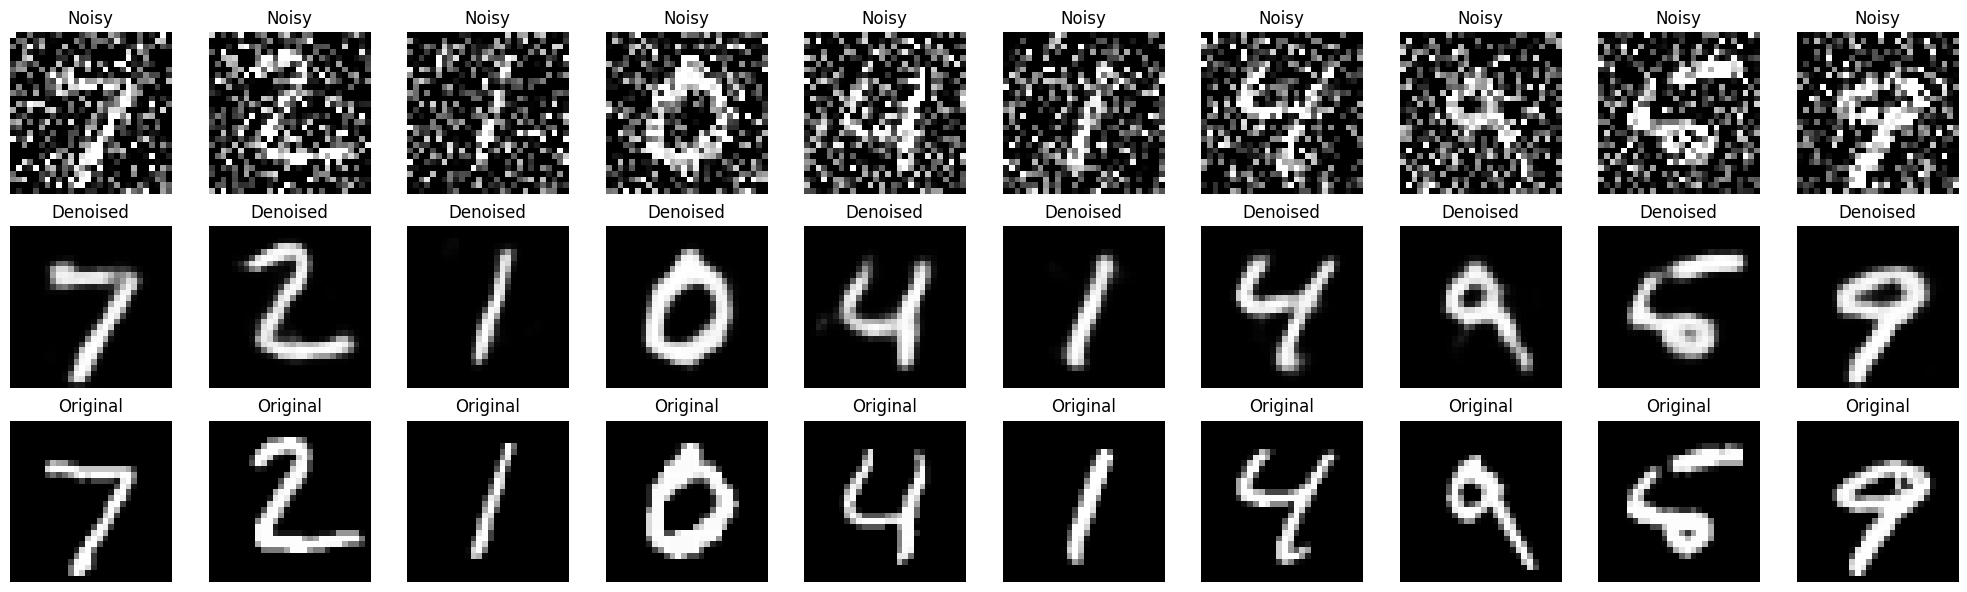

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    # Original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
plt.tight_layout()
plt.show()


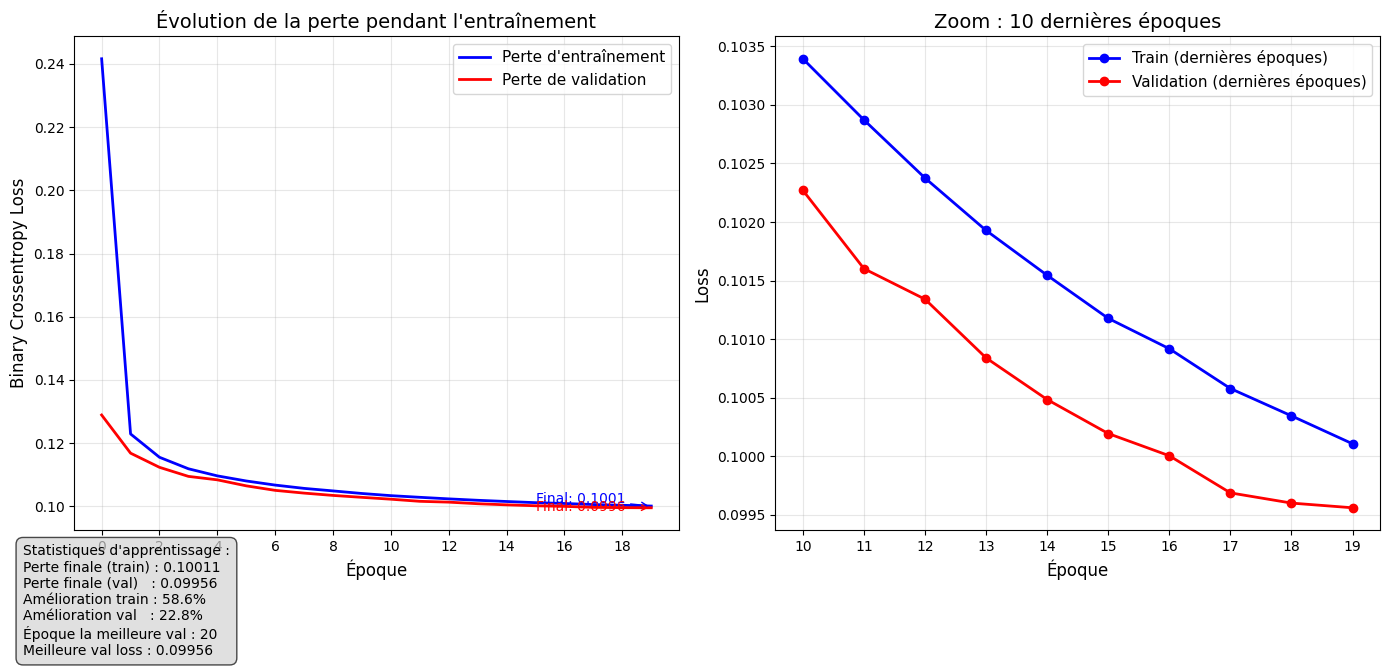

In [ ]:
# Visualisation détaillée de l'évolution de la perte
plt.figure(figsize=(14, 6))

# Subplot 1: Courbes de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', linewidth=2, label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], 'r-', linewidth=2, label='Perte de validation')
plt.title('Évolution de la perte pendant l\'entraînement', fontsize=14)
plt.xlabel('Époque', fontsize=12)
plt.ylabel('Binary Crossentropy Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 20, 2))

# Ajout des valeurs finales
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
plt.annotate(f'Final: {final_train_loss:.4f}',
             xy=(19, final_train_loss),
             xytext=(15, final_train_loss + 0.001),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=10, color='blue')
plt.annotate(f'Final: {final_val_loss:.4f}',
             xy=(19, final_val_loss),
             xytext=(15, final_val_loss - 0.001),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

# Subplot 2: Zoom sur les dernières époques
plt.subplot(1, 2, 2)
last_epochs = 10
plt.plot(range(10, 20), history.history['loss'][10:], 'b-o', linewidth=2, label='Train (dernières époques)')
plt.plot(range(10, 20), history.history['val_loss'][10:], 'r-o', linewidth=2, label='Validation (dernières époques)')
plt.title(f'Zoom : 10 dernières époques', fontsize=14)
plt.xlabel('Époque', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(range(10, 20))

# Calcul des améliorations relatives
improvement_train = 100 * (history.history['loss'][0] - history.history['loss'][-1]) / history.history['loss'][0]
improvement_val = 100 * (history.history['val_loss'][0] - history.history['val_loss'][-1]) / history.history['val_loss'][0]

# Affichage des statistiques
stats_text = f"""Statistiques d'apprentissage :
Perte finale (train) : {final_train_loss:.5f}
Perte finale (val)   : {final_val_loss:.5f}
Amélioration train : {improvement_train:.1f}%
Amélioration val   : {improvement_val:.1f}%
Époque la meilleure val : {np.argmin(history.history['val_loss'])+1}
Meilleure val loss : {np.min(history.history['val_loss']):.5f}"""

plt.figtext(0.02, -0.1, stats_text, fontsize=10,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7))

plt.tight_layout()
plt.show()